         NO       NO2       N2O
0  0.143635  0.183147  0.091760
1  0.287679  0.062956  0.091905
2  0.232998  0.134151  0.059168
3  0.199665  0.083604  0.234101
4  0.089005  0.065844  0.215951
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 5201 entries, Unnamed: 0 to 5555.555555555556
dtypes: float64(5200), int64(1)
memory usage: 39.7 MB


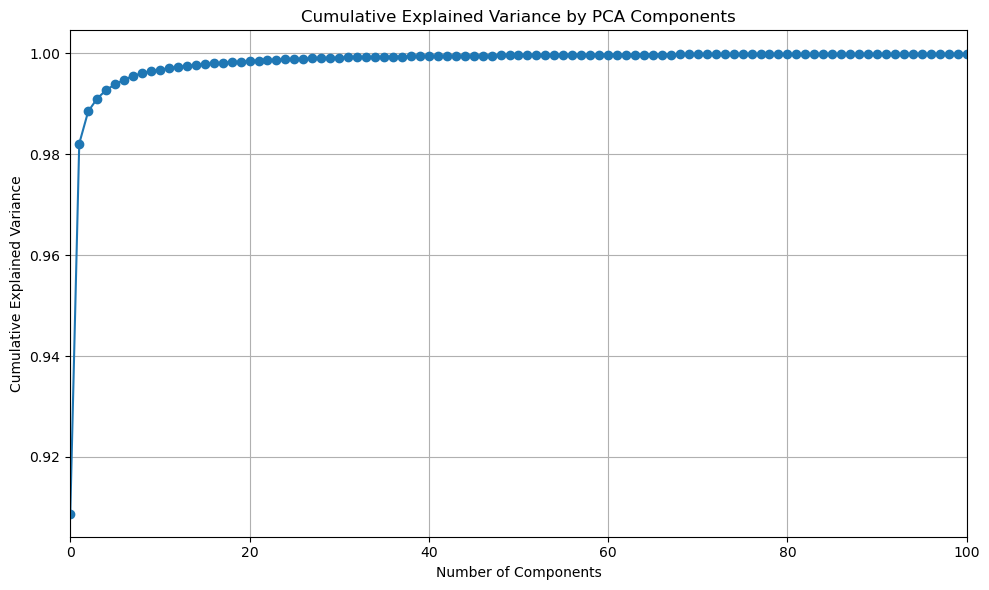

[0.90875473 0.98212014 0.9884959  0.99104354 0.99272327 0.99385833
 0.9947735  0.99554004 0.9960413  0.99643596 0.99677052 0.99705381
 0.99730831 0.99750767 0.99770401 0.99787882 0.99801621 0.99814292
 0.99826093 0.99836838 0.99847514 0.99857452 0.99866165 0.99873732
 0.99880482 0.99886727 0.99892872 0.9989864  0.99903813 0.9990879
 0.99913621 0.99917928 0.99921863 0.9992543  0.99928649 0.99931622
 0.99934493 0.9993718  0.99939817 0.9994221  0.99944369 0.99946445
 0.99948406 0.99950167 0.99951864 0.99953533 0.99955103 0.99956653
 0.99958194 0.99959615 0.99960975 0.99962304 0.99963597 0.99964815
 0.99965966 0.99967073 0.99968162 0.99969183 0.9997017  0.99971093
 0.99971945 0.99972776 0.99973582 0.99974365 0.99975112 0.99975784
 0.99976413 0.99977021 0.99977591 0.99978153 0.99978701 0.99979243
 0.99979774 0.99980294 0.99980787 0.99981271 0.99981729 0.99982172
 0.99982601 0.99983013 0.99983414 0.99983798 0.9998416  0.99984518
 0.99984867 0.99985213 0.99985546 0.99985869 0.99986185 0.99986

In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load the CSV file
file_path = "NOx_spectra.csv"
df = pd.read_csv(file_path)

labels_df = pd.read_csv('NOx_labels.csv')
concentrations = labels_df
print(concentrations.head())

# Display basic info and the first few rows
df.info(), df.head()

# Drop the first column (index)
data = df

# Standardize the data
data_log = np.log10(data + 1e-25)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_log)

# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(data_scaled)

# Explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot cumulative variance
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.xlim(0, 100)
plt.grid(True)
plt.tight_layout()
plt.show()
print(cumulative_variance)


In [65]:
labels_df = pd.read_csv('NOx_labels.csv')
concentrations = labels_df
print(concentrations.head())

         NO       NO2       N2O
0  0.143635  0.183147  0.091760
1  0.287679  0.062956  0.091905
2  0.232998  0.134151  0.059168
3  0.199665  0.083604  0.234101
4  0.089005  0.065844  0.215951


In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Select the number of principal components (say, the first N)
N = 5  # You can adjust this
X_pca = pca_result[:, :N]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_pca, concentrations, test_size=0.1)#, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

from sklearn.metrics import r2_score

# Assuming y_pred is a 2D array with shape (n_samples, n_targets), i.e., [CO2, NO2] predictions
r2_no = r2_score(y_test['NO'], y_pred[:, 0])  # CO2 (ppm) R²
r2_no2 = r2_score(y_test['NO2'], y_pred[:, 1])  # NO2 (ppb) R²
r2_n2o = r2_score(y_test['N2O'], y_pred[:, 2])  # NO2 (ppb) R²

print(f"R² score for NO (ppb): {r2_no:.3f}")
print(f"R² score for NO2 (ppb): {r2_no2:.3f}")
print(f"R² score for N2O (ppb): {r2_n2o:.3f}")

R² score for NO (ppb): 0.258
R² score for NO2 (ppb): 0.421
R² score for N2O (ppb): 0.280


In [59]:
import pandas as pd

# Create a DataFrame for comparison
results_df = pd.DataFrame({
    'True NO (ppb)': y_test['NO'],
    'Predicted NO (ppb)': y_pred[:, 0],
    'True NO2 (ppb)': y_test['NO2'],
    'Predicted NO2 (ppb)': y_pred[:, 1],
    'True N2O (ppb)': y_test['N2O'],
    'Predicted N2O (ppb)': y_pred[:, 2]
})


# Display the table
print(results_df)


     True NO (ppb)  Predicted NO (ppb)  True NO2 (ppb)  Predicted NO2 (ppb)  \
652       0.196710            0.136668    1.596539e-01             0.162836   
766       0.208536            0.192215    1.750000e-01             0.179603   
825       0.175000            0.151447    1.671920e-10             0.049317   
242       0.278716            0.222589    2.128551e-01             0.224314   
521       0.145223            0.127912    8.776447e-02             0.038796   
..             ...                 ...             ...                  ...   
694       0.078709            0.148430    1.342508e-01             0.042576   
94        0.242742            0.160293    5.452755e-02             0.174484   
597       0.093080            0.084719    7.614196e-02             0.076608   
555       0.150871            0.203563    1.575765e-01             0.189419   
514       0.061305            0.136340    2.234206e-01             0.162499   

     True N2O (ppb)  Predicted N2O (ppb)  
652     

In [56]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, y_test, y_pred, cv=10, scoring='r2')
print("Mean R²:", scores.mean())

Mean R²: 0.8572679880074793
